In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import os
import configs
from math import floor, ceil

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
from utils_summary_statistics import *
import configs

# Load data

In [2]:
stats = []
labels = []

In [3]:
# Load default model results
with open('pickles/resolution_default.p', 'rb') as f:
    default_stats = pickle.load(f)
stats.append(default_stats)
labels.append('Default')

In [4]:
# Load barcode ablation results
with open('pickles/resolution_barcode_ablation.p', 'rb') as f:
    bar_ablate_stats = pickle.load(f)
stats.append(bar_ablate_stats)
labels.append('Barcode Ablation')

In [5]:
# Load place field ablation results
with open('pickles/resolution_place_field_ablation.p', 'rb') as f:
    place_ablate_stats = pickle.load(f)
stats.append(place_ablate_stats)
labels.append('Place Field Ablation')

# Identification: sensitivity and specificity plots

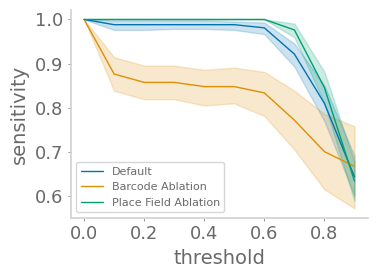

In [6]:
fig, ax = plt.subplots(figsize=(4,3))
for stat, label in zip(stats, labels):
    df = pd.DataFrame(stat['identification_1'])
    df = df[df['search strength']==0]
    sns.lineplot(
        x='threshold', y='sensitivity',
        ax=ax, data=df, label=label
        )
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison_sensitivity.png', dpi=300)
plt.show()

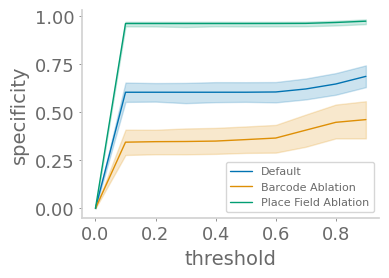

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
for stat, label in zip(stats, labels):
    df = pd.DataFrame(stat['identification_1'])
    df = df[df['search strength']==0]
    sns.lineplot(
        x='threshold', y='specificity',
        ax=ax, data=df, label=label
        )
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison_specificity.png', dpi=300)
plt.show()

# Identification: midpoint accuracy plots

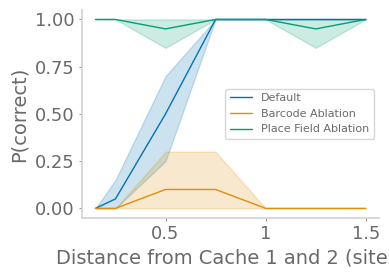

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
for stat, label in zip(stats, labels):
    df = pd.DataFrame(stat['identification_2'])
    df = df[df['search strength']==0.]
    df['binarized'] = df['noncache val'] < 0.5
    sns.lineplot(
        x='site spacing', y='binarized',
        ax=ax, data=df, label=label
        )
plt.legend()
plt.xlabel('Distance from Cache 1 and 2 (sites)')
plt.ylabel('P(correct)')
plt.xticks([10, 20, 30], [0.5, 1, 1.5])
plt.tight_layout()
plt.savefig('model_comparison_midpot.png', dpi=300)
plt.show()

# Reconstruction: P(found attractor | distance to closest attractor)

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_83121/285238920.py:17: UserWarning: The dashes list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_83121/285238920.py:17: UserWarning: The dashes list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(
/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_83121/285238920.py:17: UserWarning: The dashes list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(


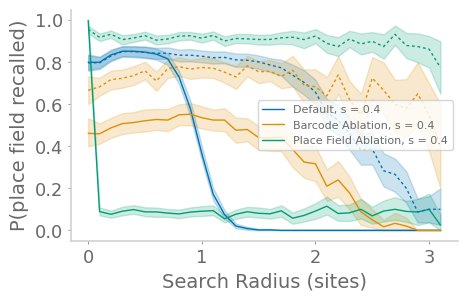

In [10]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_1'])
    df = df[df['search strength']==0.4]
    sns.lineplot(
        x='opt attractor dist', y='p_valid',
        ax=ax, data=df, label=label + ', s = 0.4',
        color=f'C{idx}'
        )
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_1'])
    df = df[df['search strength']==2.0]
    sns.lineplot(
        x='opt attractor dist', y='p_valid',
        ax=ax, data=df, #label=label + ', s = 2.0',
        color=f'C{idx}',
        dashes=[(2, 2), (2, 2)], style=True,
        )
handles, legend_labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
legend_labels = [legend_labels[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
ax.legend(handles=handles, labels=legend_labels)
plt.ylabel('P(place field recalled)')
plt.xlabel('Search Radius (sites)')
plt.xticks([0, 10, 20, 30], [0, 1, 2, 3])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


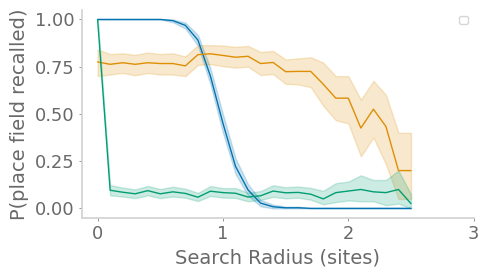

In [13]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_1'])
    df = df[df['search strength']==0.4]
    df = df[df['site spacing']>=15]
    sns.lineplot(
        x='opt attractor dist', y='p_valid',
        ax=ax, data=df, #label=label + ', s = 0.4',
        color=f'C{idx}'
        )
handles, legend_labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
legend_labels = [legend_labels[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
ax.legend(handles=handles, labels=legend_labels)
plt.ylabel('P(place field recalled)')
plt.xlabel('Search Radius (sites)')
plt.xticks([0, 10, 20, 30], [0, 1, 2, 3])
plt.tight_layout()
plt.savefig('model_comparison_pfound.png', dpi=300)
plt.show()

### Conditioned on validity, what is the error?

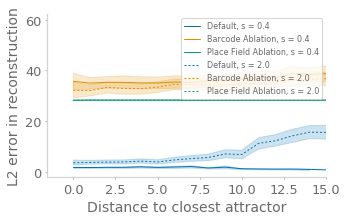

In [10]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_2'])
    df = df[df['search strength']==0.4]
    sns.lineplot(
        x='opt attractor dist', y='norm error',
        ax=ax, data=df, label=label + ', s = 0.4',
        color=f'C{idx}'
        )
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_2'])
    df = df[df['search strength']==2.0]
    sns.lineplot(
        x='opt attractor dist', y='norm error',
        ax=ax, data=df, label=label + ', s = 2.0',
        color=f'C{idx}',
        dashes=[(2, 2), (2, 2)], style=True,
        )
handles, legend_labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
legend_labels = [legend_labels[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
ax.legend(handles=handles, labels=legend_labels)
plt.ylabel('L2 error in reconstruction')
plt.xlabel('Distance to closest attractor')
plt.xlim(right=15)
plt.show()

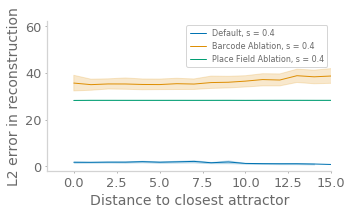

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    df = pd.DataFrame(stat['reconstruct_2'])
    df = df[df['search strength']==0.4]
    sns.lineplot(
        x='opt attractor dist', y='norm error',
        ax=ax, data=df, label=label + ', s = 0.4',
        color=f'C{idx}'
        )
handles, legend_labels = ax.get_legend_handles_labels()
handles = [handles[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
legend_labels = [legend_labels[i] for i in range(len(legend_labels)) if 'True' not in legend_labels[i]]
ax.legend(handles=handles, labels=legend_labels)
plt.ylabel('L2 error in reconstruction')
plt.xlabel('Distance to closest attractor')
plt.xlim(right=15)
plt.tight_layout()
plt.savefig('model_comparison_l2error.png', dpi=300)
plt.show()